# Librerie e Serie dati

In [1]:
%load_ext autoreload
%autoreload 2


import matplotlib
from matplotlib import style
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

import yfinance as yf
import datetime as dt
#import seaborn as sns
import pandas as pd
import numpy as np
import math
from time import time
import sys
import os

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef
from sklearn.metrics import mean_squared_error, roc_auc_score, r2_score

from nsp.nsp_utils import find_result, find_gap, find_hldif, find_emad, find_stoch, find_volat, segnale_base

from nsp.serie_process import Serie, create_Xt_Yt

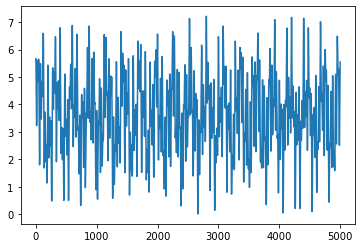

In [2]:
T = 5000
x = np.arange(0,T)
y=  np.sin(4.3*np.pi*x/200)+np.cos(8*np.pi*x/100)+np.cos(2.5*np.pi*x/50)+np.sin(0.9*np.pi*x/123)
y = y + abs(min(y)) + 0.01
plt.plot(x, y)

In [74]:
bitcoin_storico1 = '../bitcoin/Binance_BTCUSDT_d.csv'
df_bitcoin = pd.read_csv(bitcoin_storico1, skiprows=1)
df_bitcoin['Date'] = pd.to_datetime(df_bitcoin['Date'])
df_bitcoin.sort_values('Date', inplace=True)

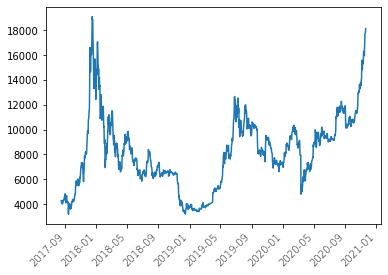

In [89]:
plt.plot(df_bitcoin['Date'], df_bitcoin['Close'])
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium',
);

In [3]:
sinusoide = Serie(x,y)

In [91]:
bitcoin = Serie(df_bitcoin['Date'].values,  df_bitcoin['Close'].values)

### Indicatori aggiuntivi

In [4]:
# Period of Fast EMA
fast_emad = 8 #@param {type:"slider", min:1, max:16, step:1}
# Period of Slow EMA
slow_emad = 18 #@param {type:"slider", min:1, max:32, step:1}
# K period for the stochastic oscillator
k_stoch = 5 #@param {type:"slider", min:1, max:16, step:1}
# Smoothing Period for Stochastic Oscillator
smooth_stoch = 3 #@param {type:"slider", min:1, max:8, step:1}
# Volatility Calculation Period
period_volat = 6 #@param {type:"slider", min:1, max:16, step:1}
# Autocorrelation period
window_autocorr = 30 #@param {type:"slider", min:10, max:90, step:5}
# Autocorrelation lag
lag_autocorr = 4 #@param {type:"slider", min:1, max:10, step:1}

In [4]:
sinusoide.aggiungi_indicatori(window_autocorr, lag_autocorr, fast_emad, slow_emad, period_volat, k_stoch, smooth_stoch)

In [94]:
bitcoin.aggiungi_indicatori(window_autocorr, lag_autocorr, fast_emad, slow_emad, period_volat, k_stoch, smooth_stoch)

In [ ]:
bitcoin.df

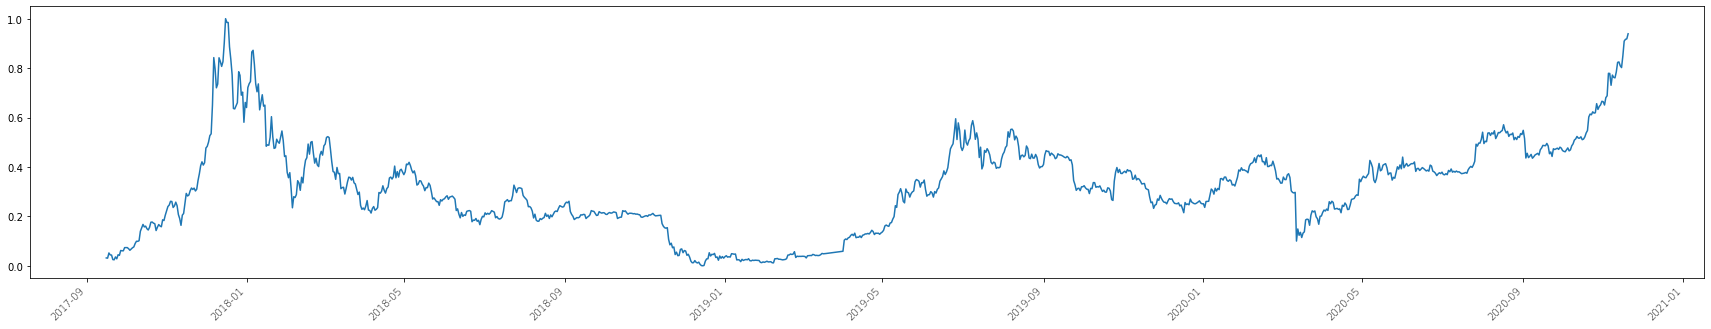

In [95]:
def plot_serie(serie, x, y):
    plt.figure(figsize=(30,5))
    plt.plot(serie[x], serie[y] )
    plt.xticks(
        rotation=45,
        horizontalalignment='right',
        fontweight='light',
        fontsize='medium',
    );
    
plot_serie(bitcoin.new_data, 'Date', 'CLOSE')

In [105]:
WINDOW = 32   #da 10 a 90...
EMB_SIZE = 4  
PERCENT = 0.2   #test data
STEP = 1 
FORECAST = 1

data, label = bitcoin.crea_pezzetti_window(WINDOW, STEP, FORECAST)
X_train, X_test, Y_train, Y_test = Serie.create_Xt_Yt(data, label, PERCENT)